In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [222]:
df = pd.read_csv('data_log.csv', thousands=',')

In [223]:
df = df.mask(df.eq('None')).dropna()

In [224]:
df['RPM'] = df['RPM'].str.replace(",","")
df['Horsepower'] = df['Horsepower'].str.replace(",","")
df['Torque'] = df['Torque'].str.replace(",","")

In [225]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [226]:
df = df[df['RPM'].map(is_number) == True]
df = df[df['Horsepower'].map(is_number) == True]
df = df[df['Torque'].map(is_number) == True]

In [227]:
#drop invalid rpms
df = df[df['RPM'].map(int) > 3000]
df = df[df['RPM'].map(int) < 10000]

In [228]:
df = df.apply(pd.to_numeric)

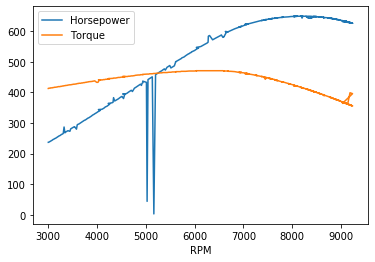

In [229]:
df.plot(x ='RPM', y=['Horsepower','Torque'], kind = 'line')	

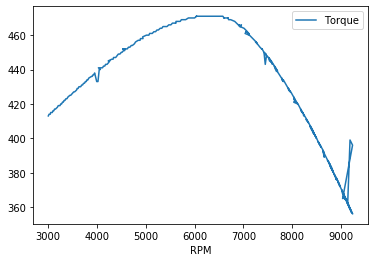

In [230]:
df.plot(x ='RPM', y='Torque', kind = 'line')	

In [231]:
df.sort_values(by='RPM')

,RPM,Horsepower,Torque
0,3006,237,413
1,3023,238,414
2,3046,240,414
3,3055,241,415
5,3087,244,415
...,...,...,...
419,9199,628,358
410,9213,627,357
420,9213,627,357
428,9235,626,396


In [235]:
df.loc[df['Torque'].idxmax()]

RPM           6045
Horsepower     542
Torque         471
Name: 167, dtype: int64

In [236]:
df.loc[df['Horsepower'].idxmax()]

RPM           8109
Horsepower     649
Torque         420
Name: 294, dtype: int64